In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
nestboot_df = pd.read_csv('../nestboot_results/matlab_nestboot_results.csv')
tigress_df = pd.read_csv('../nestboot_results/matlab_all_methods_results.csv')


In [4]:
nestboot_df['topology']=nestboot_df.network.str.split('/').str[3]
nestboot_df['snr']=nestboot_df.dataset.str.split('-').str[5]
nestboot_df['method'] = nestboot_df['method'].apply(lambda x: f'nestboot {x}')
# nestboot_df=nestboot_df[(nestboot_df.method=='NestBoot LSCO')]
# nestboot_df.method='nestboot'+nestboot_df.method
nestboot_df['mcc']=nestboot_df.precision*nestboot_df.recall/np.sqrt((nestboot_df.precision+nestboot_df.recall)/2)

In [5]:
nestboot_df.method.replace({'nestboot LASSO':'nestboot lasso','nestboot LSCO':'nestboot lsco'},inplace=True)

In [6]:
tigress_df=tigress_df[(tigress_df.method=='tigress')|(tigress_df.method=='lsco')|(tigress_df.method=='lasso')]
tigress_df['topology']=tigress_df.network.str.split('/').str[3]
tigress_df['snr']=tigress_df.dataset.str.split('-').str[5]


In [7]:
df = pd.concat([nestboot_df, tigress_df], ignore_index=True)

In [8]:
df.dropna(subset='f1')

,method,n_init,n_boot,fdr,time,auroc,f1,precision,recall,density,...,use_nestboot,execution_time,memory_usage,parameter_index,num_edges,sparsity,network_shape_0,network_shape_1,sensitivity,specificity
0,nestboot lsco,10.0,10.0,5.0,0.269865,0.500000,0.000000,0.000000,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nestboot lsco,10.0,10.0,5.0,0.210086,0.500000,0.000000,0.000000,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nestboot lsco,10.0,10.0,5.0,0.181719,0.500000,0.000000,0.000000,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nestboot lsco,10.0,10.0,5.0,0.176210,0.500000,0.000000,0.000000,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nestboot lsco,10.0,10.0,5.0,0.180090,0.500000,0.000000,0.000000,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,lsco,NaN,NaN,NaN,NaN,0.950660,0.436709,1.000000,NaN,0.0276,...,0.0,0.004677,0.0,25.0,69.0,0.9724,50.0,50.0,0.279352,1.000000
819,tigress,NaN,NaN,NaN,NaN,0.038844,0.278075,0.409449,NaN,0.0508,...,0.0,0.560445,0.0,25.0,127.0,0.9492,50.0,50.0,0.210526,0.966711
820,lasso,NaN,NaN,NaN,NaN,0.882077,0.436782,0.505319,NaN,0.0752,...,0.0,1.021565,0.0,25.0,188.0,0.9248,50.0,50.0,0.384615,0.958722
821,lsco,NaN,NaN,NaN,NaN,0.601180,0.431746,1.000000,NaN,0.0272,...,0.0,0.004821,0.0,25.0,68.0,0.9728,50.0,50.0,0.275304,1.000000


In [9]:
melted = df.melt(id_vars=['method', 'snr', 'topology'], value_vars=['auroc', 'f1', 'mcc'],var_name='metric')
melted


,method,snr,topology,metric,value
0,nestboot lsco,SNR10,random,auroc,0.500000
1,nestboot lsco,SNR1000,random,auroc,0.500000
2,nestboot lsco,SNR100000,random,auroc,0.500000
3,nestboot lsco,SNR10,random,auroc,0.500000
4,nestboot lsco,SNR1000,random,auroc,0.500000
...,...,...,...,...,...
2464,lsco,SNR1000,smallworld,mcc,0.508820
2465,tigress,SNR1000,smallworld,mcc,0.240843
2466,lasso,SNR100000,smallworld,mcc,0.388487
2467,lsco,SNR100000,smallworld,mcc,0.505016


In [15]:
methods = ['tigress', 'lasso', 'nestboot lasso','lsco', 'nestboot lsco']

# Plot
g = sns.FacetGrid(melted, row='snr', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.boxplot, x='metric', y='value', hue='method', hue_order=methods, palette='muted')
g.add_legend()
# Move legend to top right
g._legend.set_bbox_to_anchor((0.9, 0.9), transform=g.fig.transFigure)
g.set_axis_labels('Metric', 'Score')
g.set_titles(col_template='Topology: {col_name}', row_template='SNR: {row_name}')

plt.tight_layout()
# plt.savefig('benchmark_results/plots/filtered_comparison_all.png', dpi=300)
plt.close()


In [17]:
python_results = pd.read_csv('../nestboot_results/python_snr_all_methods_results.csv')
python_results['topology']=python_results.network.str.split('/').str[3]
python_results['snr']=python_results.dataset.str.split('-').str[5]
python_results['language']='python'

In [37]:
python_results['snr']=python_results.dataset.str.split('-').str[0]

In [20]:
matlab_results = pd.read_csv('../nestboot_results/matlab_all_methods_results.csv')
matlab_results['topology']=matlab_results.network.str.split('/').str[3]
matlab_results['snr']=matlab_results.dataset.str.split('-').str[5]
matlab_results['language']='matlab'

In [39]:
python_results

,dataset,network,method,source,execution_time,memory_usage,f1_score,auroc,precision,recall,mcc,density,timestamp,topology,snr,language
0,SNR0.01-MATLAB-N100-ID17.json,SNR0.01-MATLAB-N100-ID17.json,LASSO,Python,50.274022,0.0,0.094118,0.528508,0.135593,0.072072,0.076532,0.0177,2025-12-03T13:49:42.764341,NaN,SNR0.01,python
1,SNR0.01-MATLAB-N100-ID17.json,SNR0.01-MATLAB-N100-ID17.json,LSCO,Python,2.639007,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.0000,2025-12-03T13:49:45.767942,NaN,SNR0.01,python
2,SNR0.01-MATLAB-N100-ID17.json,SNR0.01-MATLAB-N100-ID17.json,CLR,Python,12.993359,0.0,0.045548,0.359575,0.023540,0.699700,-0.535859,0.9898,2025-12-03T13:49:59.014281,NaN,SNR0.01,python
3,SNR0.01-MATLAB-N100-ID17.json,SNR0.01-MATLAB-N100-ID17.json,GENIE3,Python,28.613256,0.0,0.045759,0.465596,0.023657,0.696697,-0.383136,0.9807,2025-12-03T13:50:28.842472,NaN,SNR0.01,python
4,SNR0.01-MATLAB-N100-ID19.json,SNR0.01-MATLAB-N100-ID19.json,LASSO,Python,36.845017,0.0,0.000000,0.499638,0.000000,0.000000,-0.004843,0.0007,2025-12-03T13:51:09.213740,NaN,SNR0.01,python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,SNR0.10-Python-N100-ID4.json,SNR0.10-Python-N100-ID4.json,NestBoot+LSCO,Python,155.226666,0.0,0.026769,0.499216,0.015819,0.086957,-0.000695,0.0885,2025-12-04T06:47:11.723337,NaN,SNR0.10,python
100,SNR0.10-Python-N100-ID5.json,SNR0.10-Python-N100-ID5.json,TIGRESS,Python,302.519222,0.0,0.011628,0.491669,0.008043,0.020979,-0.010374,0.0373,2025-12-04T06:52:15.455238,NaN,SNR0.10,python
101,SNR0.10-Python-N100-ID5.json,SNR0.10-Python-N100-ID5.json,NestBoot+LASSO,Python,763.427869,0.0,0.012658,0.462580,0.006959,0.069930,-0.025330,0.1437,2025-12-04T07:04:59.086163,NaN,SNR0.10,python
102,SNR0.10-Python-N100-ID5.json,SNR0.10-Python-N100-ID5.json,NestBoot+LSCO,Python,229.796558,0.0,0.028490,0.507048,0.016484,0.104895,0.005819,0.0910,2025-12-04T07:08:49.146913,NaN,SNR0.10,python


In [69]:
df = pd.concat([python_results, matlab_results], ignore_index=True)
melted = df.melt(id_vars=['method', 'snr', 'topology','language'], value_vars=['auroc', 'f1', 'mcc'],var_name='metric')
melted.snr.replace({'SNR100000':'SNR1.00','SNR1000':'SNR0.10','SNR10':'SNR0.01'},inplace=True)
valid_snr = ["SNR1.00", "SNR0.10", "SNR0.01"]
melted = melted[melted["snr"].isin(valid_snr)]
melted.method.replace({'LASSO':'lasso','LSCO':'lsco','GENIE3':'genie3','CLR':'clr','TIGRESS':'tigress'},inplace=True)

In [70]:
sum(melted['language']=='python')

312

In [73]:
melted.to_csv('../nestboot_results/language_comparison_results.csv', index=False,sep='\t')

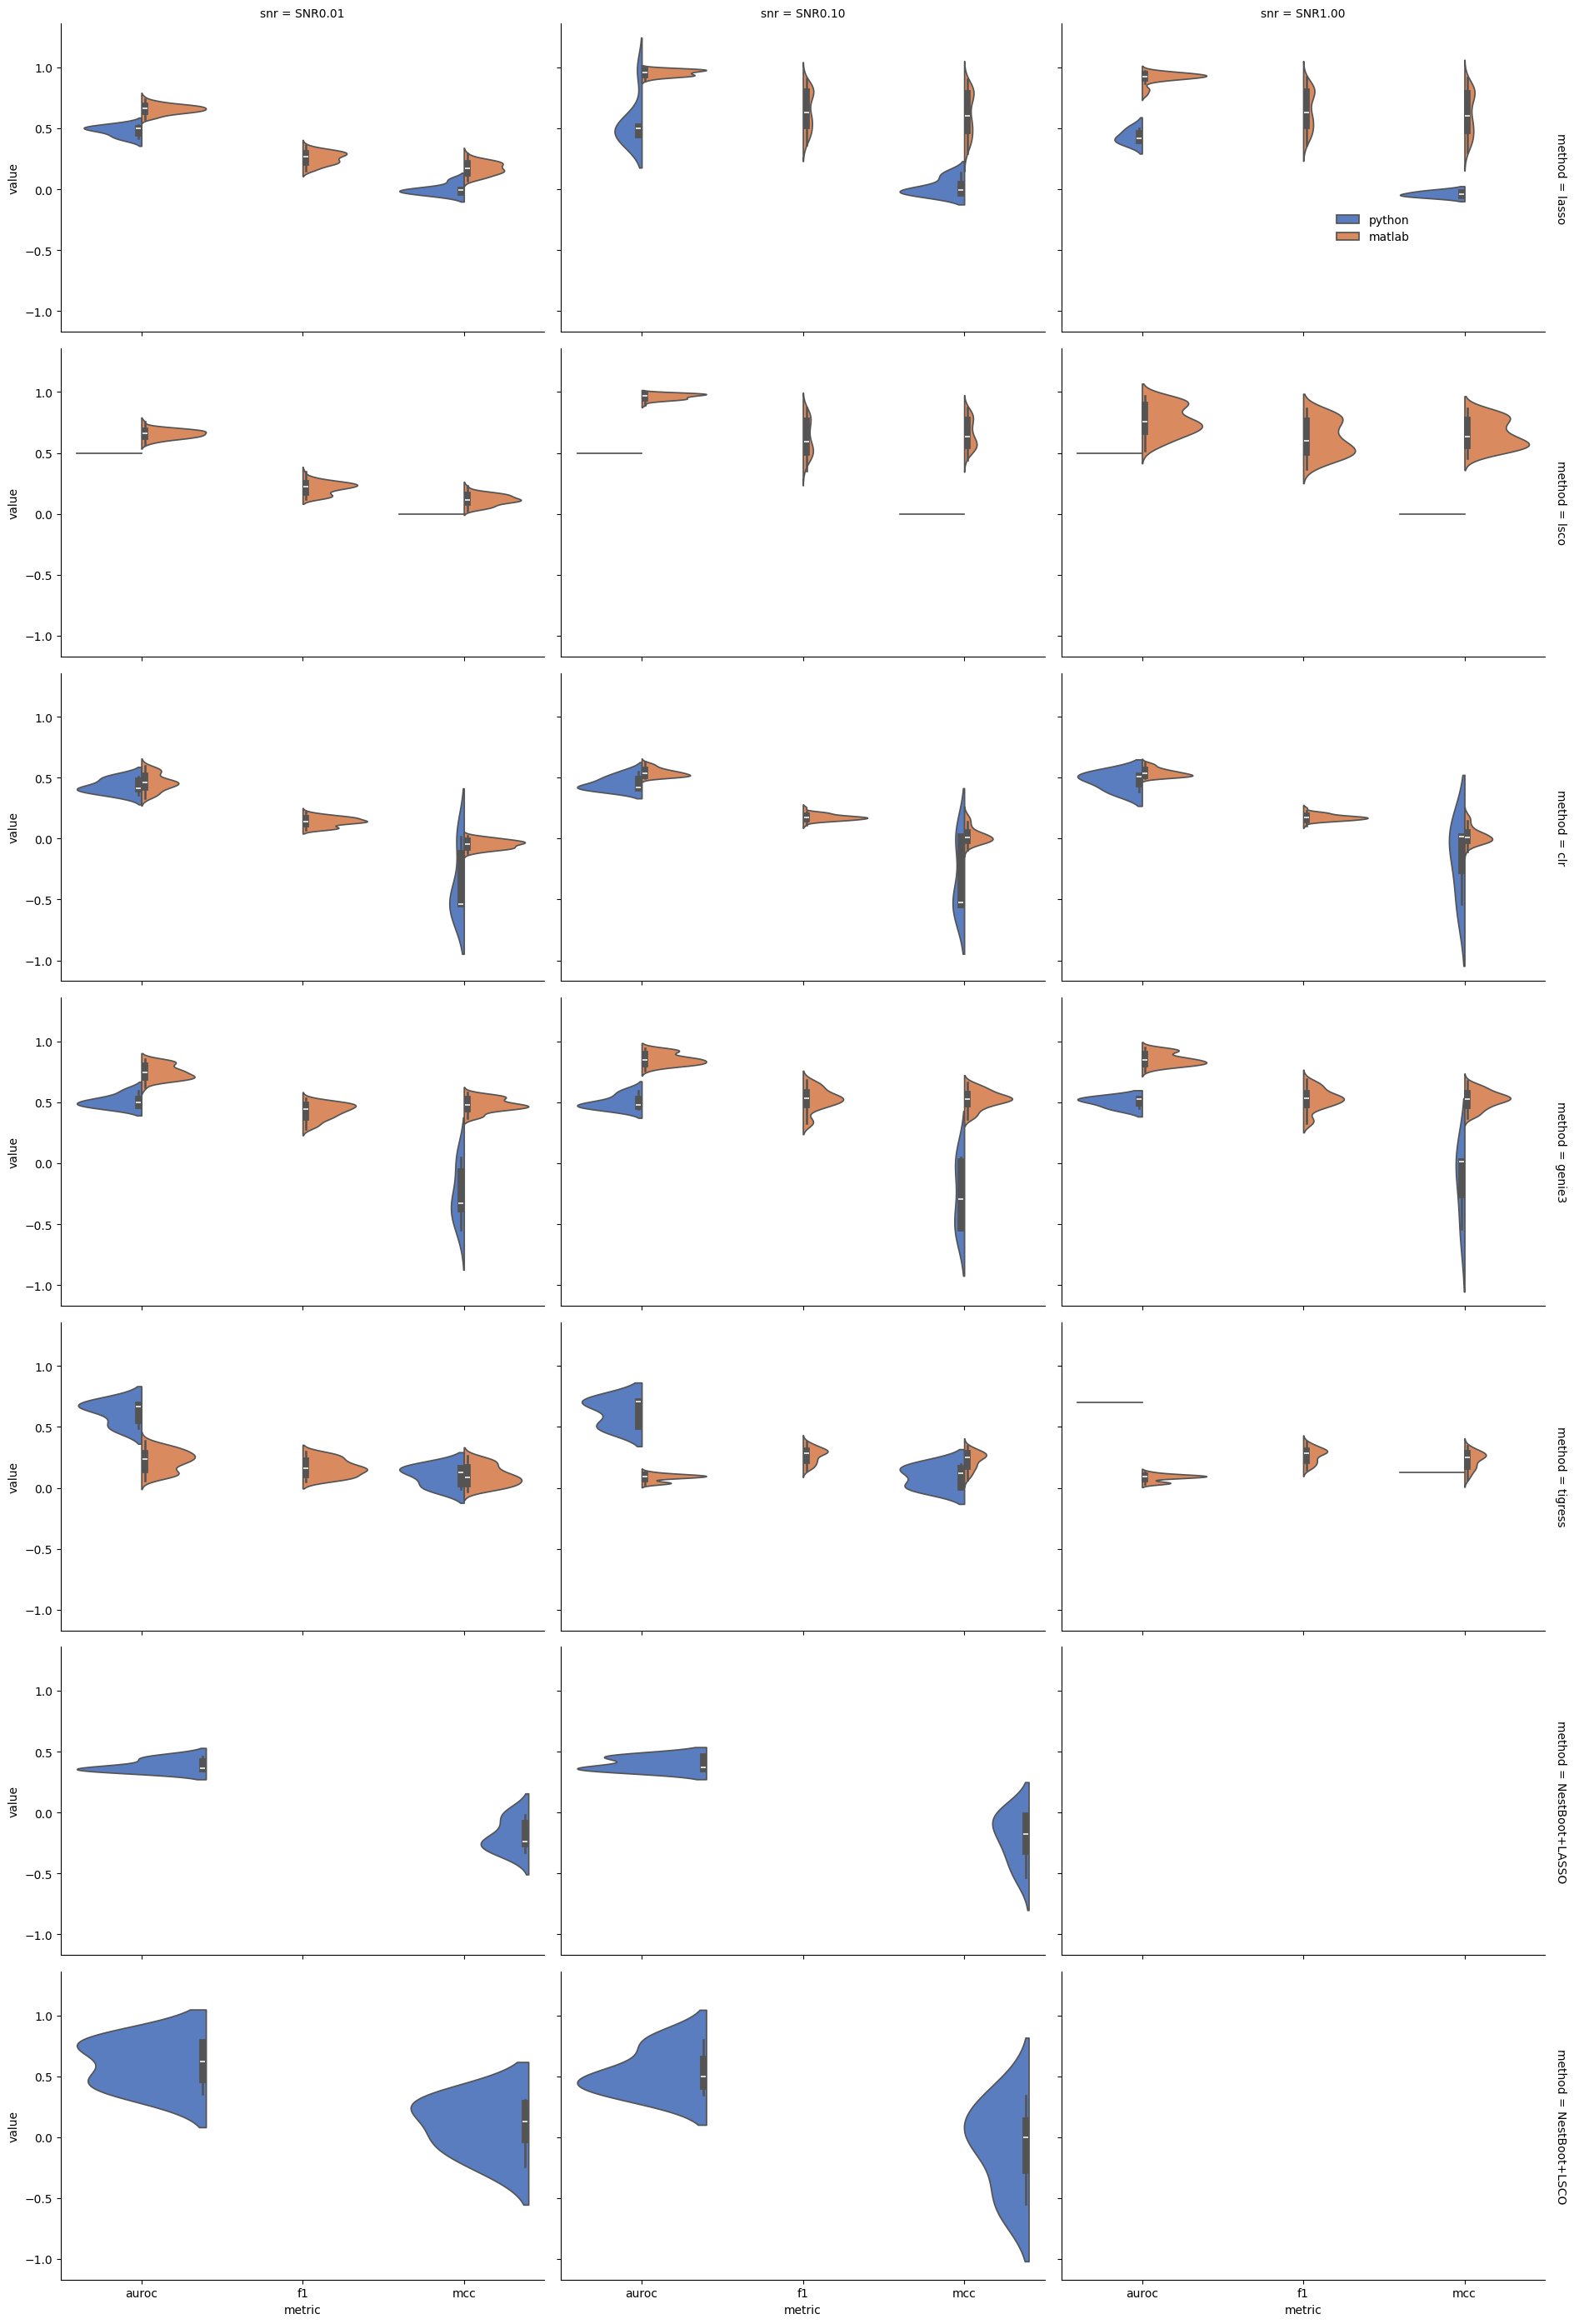

In [72]:
methods = ['clr','genie3','lasso', 'lsco', 'tigress']

# Plot
g = sns.FacetGrid(melted, col='snr', row='method', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.violinplot, split='language', x='metric', y='value', hue='language', palette='muted')
g.add_legend()
# Move legend to top right
g._legend.set_bbox_to_anchor((0.9, 0.9), transform=g.fig.transFigure)

# g.set_axis_labels('Metric', 'Score')
# g.set_titles(col_template='SNR: {col_name}', row_template='method: {row_name}')

plt.tight_layout()
# plt.savefig('benchmark_results/plots/language_comparison_all.png', dpi=300)
# plt.close()


In [2]:
import pandas as pd
melted = pd.read_csv('../results/language_comparison_results.csv',sep='\t')


In [3]:
melted.method.unique()

valid_methods = ['lasso', 'lsco', 'clr', 'genie3', 'tigress']
melted = melted[melted["method"].isin(valid_methods)]

In [4]:
melted.drop('topology', axis=1, inplace=True)

In [5]:
melted

,method,snr,language,metric,value
0,lasso,SNR0.01,python,auroc,0.528508
1,lsco,SNR0.01,python,auroc,0.500000
2,clr,SNR0.01,python,auroc,0.359575
3,genie3,SNR0.01,python,auroc,0.465596
4,lasso,SNR0.01,python,auroc,0.499638
...,...,...,...,...,...
3907,lasso,SNR1.00,matlab,mcc,0.388487
3908,lsco,SNR1.00,matlab,mcc,0.505016
3909,clr,SNR1.00,matlab,mcc,0.034763
3910,genie3,SNR1.00,matlab,mcc,0.544327


In [15]:
# Group by the relevant columns and calculate descriptive statistics
grouped_stats = melted.groupby(['method', 'snr', 'metric', 'language'])['value'].describe()

# Display the result
grouped_stats

count      mean       std       min  \
method  snr     metric language                                        
clr     SNR0.01 auroc  matlab     80.0  0.462522  0.070522  0.328587   
                       python      6.0  0.431446  0.057149  0.359575   
                f1     matlab     80.0  0.139884  0.037365  0.071979   
                       python      0.0       NaN       NaN       NaN   
                mcc    matlab     80.0 -0.045421  0.036292 -0.123743   
...                                ...       ...       ...       ...   
tigress SNR1.00 auroc  python      1.0  0.699128       NaN  0.699128   
                f1     matlab     80.0  0.268655  0.061219  0.146444   
                       python      0.0       NaN       NaN       NaN   
                mcc    matlab     80.0  0.226609  0.071607  0.066442   
                       python      1.0  0.124167       NaN  0.124167   

                                      25%       50%       75%       max  
method  snr     metric language                                          
clr     SNR0.01 auroc  matlab    0.417541  0.458935  0.516466  0.597622  
                       python    0.404501  0.412435  0.473604  0.508380  
                f1     matlab    0.117815  0.140400  0.169525  0.218532  
                       python         NaN       NaN       NaN       NaN  
                mcc    matlab   -0.075944 -0.042711 -0.016510  0.022338  
...                                   ...       ...       ...       ...  
tigress SNR1.00 auroc  python    0.699128  0.699128  0.699128  0.699128  
                f1     matlab    0.219009  0.286489  0.307161  0.379404  
                       python         NaN       NaN       NaN       NaN  
                mcc    matlab    0.172070  0.248679  0.281026  0.347004  
                       python    0.124167  0.124167  0.124167  0.124167  

[90 rows x 8 columns]

In [16]:
from scipy import stats
import numpy as np
import pandas as pd

def cohens_d(x, y):
    """Calculate Cohen's d for effect size."""
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

similarity_results = []

# Iterate over each group to compare Python vs Matlab
# We expect 5 methods * 3 SNRs * 3 Metrics = 45 groups
for name, group in melted.groupby(['method', 'snr', 'metric']):
    python_data = group[group['language'] == 'python']['value'].dropna()
    matlab_data = group[group['language'] == 'matlab']['value'].dropna()
    
    # We need enough data points for these tests
    if len(python_data) > 5 and len(matlab_data) > 5:
        # 1. Mann-Whitney U Test 
        u_stat, u_pval = stats.mannwhitneyu(python_data, matlab_data, alternative='two-sided')
        
        # 2. Kolmogorov-Smirnov (KS) Test
        ks_stat, ks_pval = stats.ks_2samp(python_data, matlab_data)
        
        # 3. Cohen's d (Effect Size)
        d = cohens_d(python_data, matlab_data)
        
        similarity_results.append({
            'method': name[0],
            'snr': name[1],
            'metric': name[2],
            'n_python': len(python_data),
            'n_matlab': len(matlab_data),
            'p_mannwhitney': u_pval,
            'p_ks': ks_pval,
            'cohens_d': d,
            'mean_diff': python_data.mean() - matlab_data.mean()
        })

sim_df = pd.DataFrame(similarity_results)

print("Similarity Analysis Summary:")
print("-" * 40)
print(f"Total comparisons analyzed: {len(sim_df)}")
print(f"Comparisons with statistically indistinguishable distributions (KS p > 0.01): {len(sim_df[sim_df['p_ks'] > 0.01])}")
print(f"Comparisons with Negligible/Small Effect Size (|d| < 0.5): {len(sim_df[abs(sim_df['cohens_d']) < 0.5])}")

print("\nFull Similarity Analysis Results (All Comparisons):")
# Sort by method, snr, and metric for easier reading
sorted_df = sim_df.sort_values(by=['method', 'snr', 'metric'])

# Display all rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    display(sorted_df)

Similarity Analysis Summary:
----------------------------------------
Total comparisons analyzed: 20
Comparisons with statistically indistinguishable distributions (KS p > 0.01): 3
Comparisons with Negligible/Small Effect Size (|d| < 0.5): 2

Full Similarity Analysis Results (All Comparisons):


,method,snr,metric,n_python,n_matlab,p_mannwhitney,p_ks,cohens_d,mean_diff
0,clr,SNR0.01,auroc,6,80,2.744035e-01,2.172590e-01,-0.445239,-0.031077
1,clr,SNR0.01,mcc,6,80,1.317402e-01,5.832335e-03,-3.980532,-0.310670
2,clr,SNR0.10,auroc,7,80,7.323155e-05,1.091599e-05,-2.427820,-0.087220
3,clr,SNR0.10,mcc,7,80,1.106359e-02,1.608553e-02,-3.251300,-0.329982
4,genie3,SNR0.01,auroc,6,80,4.253916e-09,4.253916e-09,-4.050734,-0.239587
5,genie3,SNR0.01,mcc,6,80,4.253916e-09,4.253916e-09,-9.471731,-0.733555
6,genie3,SNR0.10,auroc,7,80,3.422691e-10,3.422691e-10,-7.253277,-0.354251
7,genie3,SNR0.10,mcc,7,80,3.422691e-10,3.422691e-10,-7.695250,-0.786974
8,lasso,SNR0.01,auroc,6,80,4.253916e-09,4.253916e-09,-4.654045,-0.177819
9,lasso,SNR0.01,mcc,6,80,1.701566e-08,1.191096e-07,-3.349846,-0.174926
